## **Exploratory Data Analysis**

#### **Aim:**
- To classify the potential churn customers based on numerical and categorical features.
- It is a binary classification problem for an imbalanced dataset.

In [2]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
# Reading CSV File and # Look at the top 5 records of data

df = pd.read_csv("D:\AI & ML Intern\Telecom Churn Prediction\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")


dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## **Dataset Attributes**




| Attribute          | Description                                                |
|--------------------|------------------------------------------------------------|
| customerID         | Customer ID                                                |
| gender             | Whether the customer is a male or a female                 |
| SeniorCitizen      | Whether the customer is a senior citizen or not (1, 0)      |
| Partner            | Whether the customer has a partner or not (Yes, No)        |
| Dependents         | Whether the customer has dependents or not (Yes, No)       |
| tenure             | Number of months the customer has stayed with the company  |
| PhoneService       | Whether the customer has a phone service or not (Yes, No)  |
| MultipleLines      | Whether the customer has multiple lines or not             |
| InternetService    | Customer’s internet service provider (DSL, Fiber optic, No)|
| OnlineSecurity     | Whether the customer has online security or not            |
| OnlineBackup       | Whether the customer has online backup or not              |
| DeviceProtection   | Whether the customer has device protection or not          |
| TechSupport        | Whether the customer has tech support or not               |
| StreamingTV        | Whether the customer has streaming TV or not              |
| StreamingMovies    | Whether the customer has streaming movies or not          |
| Contract           | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling   | Whether the customer has paperless billing or not          |
| PaymentMethod      | The customer’s payment method                               |
| MonthlyCharges     | The amount charged to the customer monthly                 |
| TotalCharges       | The total amount charged to the customer                   |
| Churn              | Whether the customer churned or not (Yes or No)            |

## **Undertanding the data**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Check the various attributes of data like shape (rows and cols), Columns, datatypes

df.shape 

(7043, 21)

The data set includes information about:

**Customers** who left within the last month – the column is called Churn

**Services** that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

**Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

**Demographic info about customers** – gender, age range, and if they have partners and dependents

In [6]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Columns in the Dataset
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.info() # summery of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
for feature in df.columns:
    if df[feature].dtype == object:
      print(f"{feature}: {df[feature].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [10]:
# Check the descriptive statistics of numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- >The dataset has too many features with text data and are probably categorical features!
- >Total Charges is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

- SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month



In [13]:
100*df['tenure'].value_counts()/len(df['tenure'])
100*df['SeniorCitizen'].value_counts()/len(df['SeniorCitizen'])

SeniorCitizen
0    83.785319
1    16.214681
Name: count, dtype: float64

## **Visualize missing values**

General Thumb Rules:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

'\nWhite lines: Each white line in a column represents a missing value for that variable in a specific row.\nDark cells: If a column is entirely dark (no white lines), it means there are no missing values in that variable across all rows.\n'

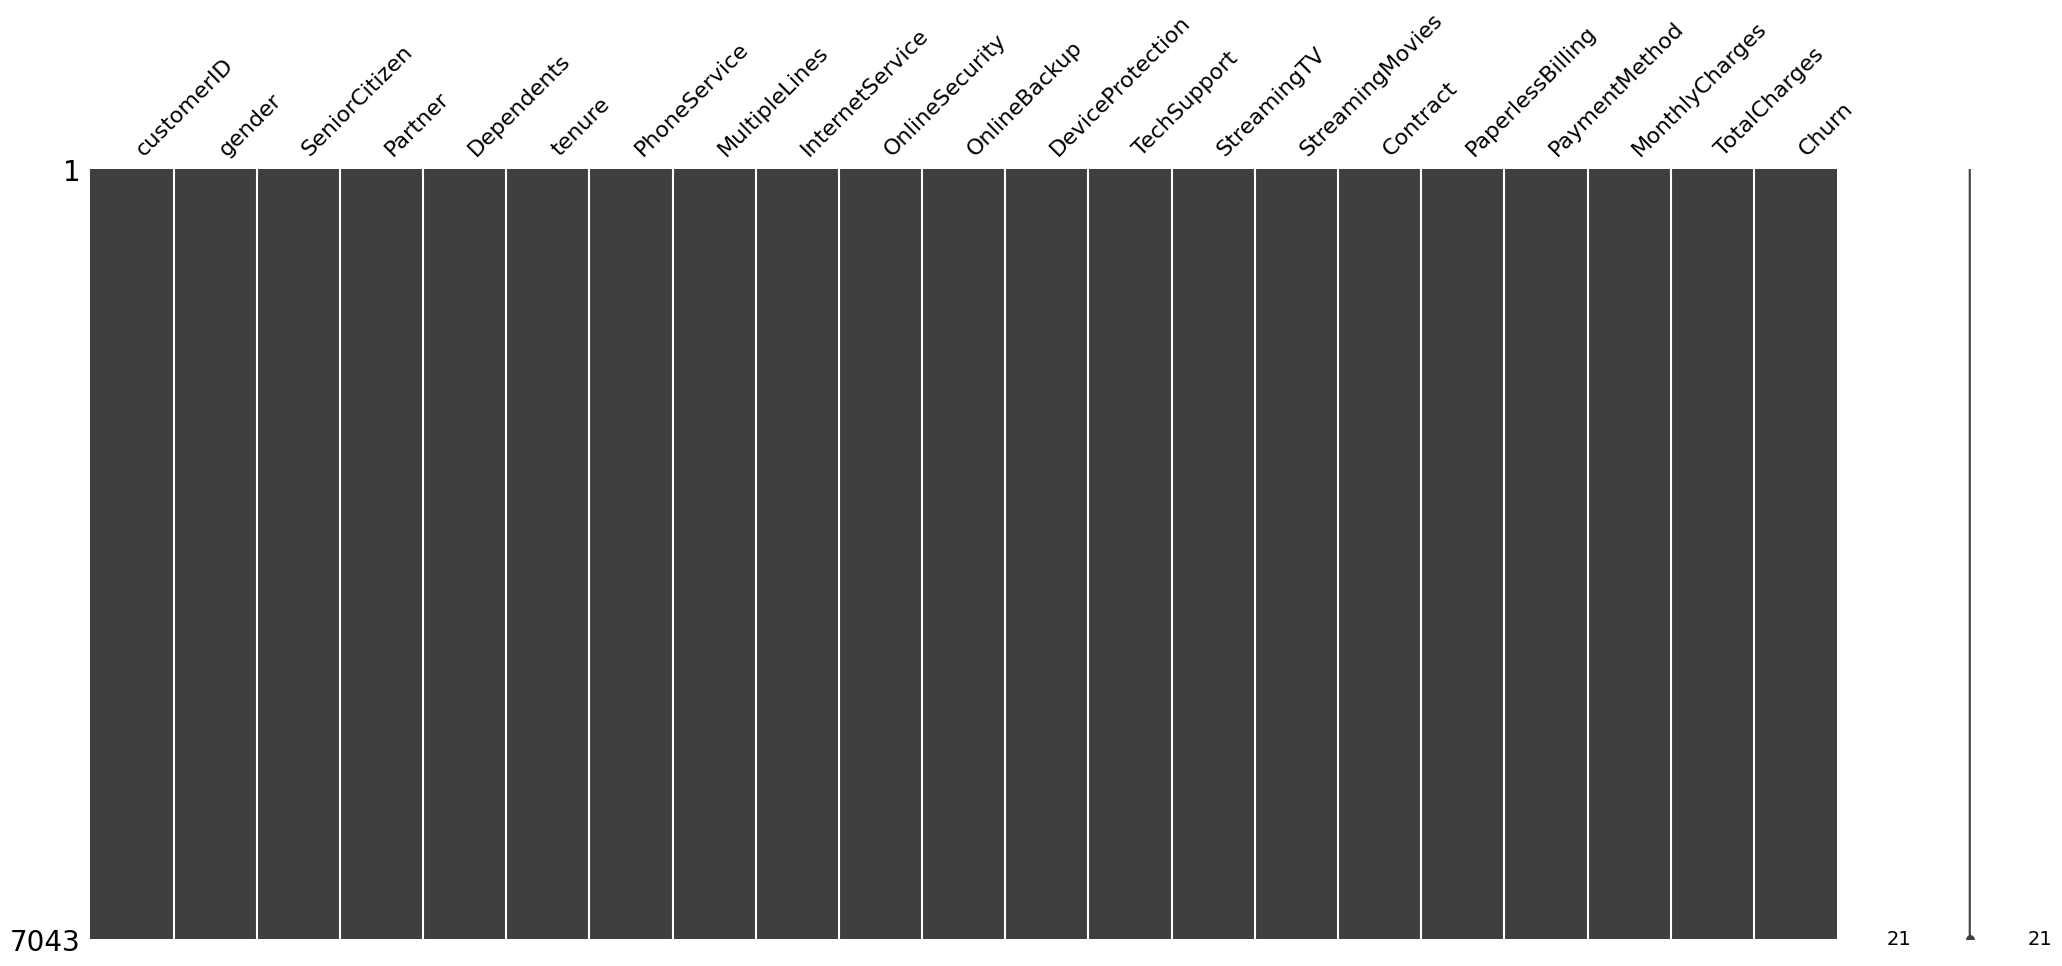

In [14]:
# Visualize missing values as a matrix
import missingno as msno
msno.matrix(df)
'''
White lines: Each white line in a column represents a missing value for that variable in a specific row.
Dark cells: If a column is entirely dark (no white lines), it means there are no missing values in that variable across all rows.
'''

'The resulting heatmap will have color variations where missing values are present. \nDarker areas indicate non-missing values, while lighter areas indicate missing values.'

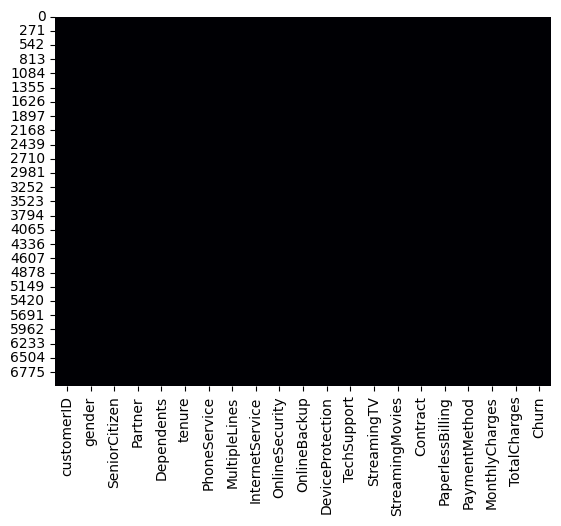

In [15]:
# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)
'''The resulting heatmap will have color variations where missing values are present. 
Darker areas indicate non-missing values, while lighter areas indicate missing values.'''


From the above visualisations we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

## **Data Manipulation**

In [16]:
# Create a copy of base data for manupulation & processing
telecom_data = df.copy()
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
telecom_data = telecom_data.drop(['customerID'], axis = 1)
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Total Charges should be numeric amount. Let's convert it to numerical data type

telecom_data.TotalCharges = pd.to_numeric(telecom_data.TotalCharges, errors='coerce')
telecom_data.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column. 

<Axes: >

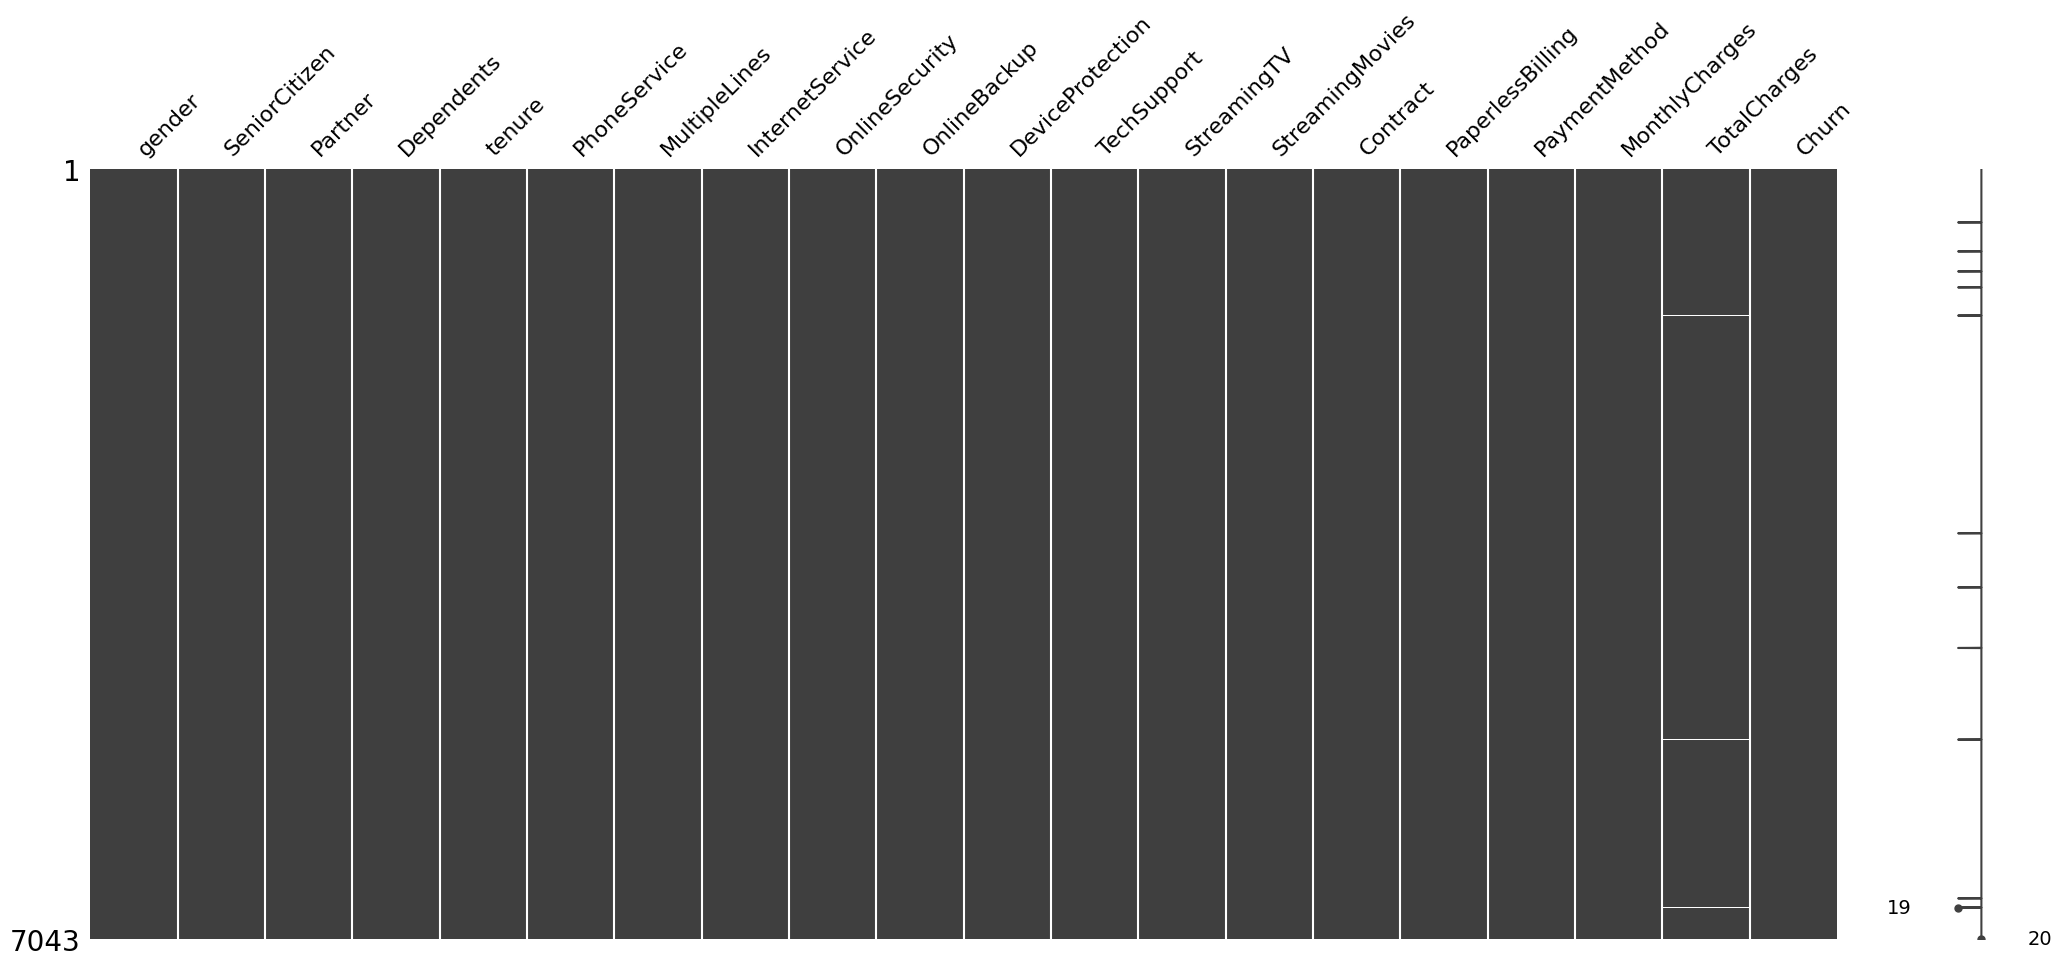

In [19]:
import missingno as msno
msno.matrix(telecom_data)

In [20]:
# Let's check these 11 missing records

telecom_data[np.isnan(telecom_data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### **Missing Value Treatement**

It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty. Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.


In [21]:
# Let's see if there are any other 0 values in the tenure column.
telecom_data[telecom_data['tenure'] == 0].index
# There are no additional missing values in the Tenure column.

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [22]:
# Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

telecom_data.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
telecom_data[telecom_data['tenure'] == 0].index

Index([], dtype='int64')

In [23]:
# To solve the problem of missing values in TotalCharges column, 
# I decided to fill it with the mean of TotalCharges values.

telecom_data.fillna(telecom_data["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [24]:

telecom_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
telecom_data["SeniorCitizen"]= telecom_data["SeniorCitizen"].map({0: "No", 1: "Yes"})
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
telecom_data["InternetService"].describe()
# df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [27]:
numeric_data = telecom_data.select_dtypes(exclude='object')
categorical_data = telecom_data.select_dtypes(include='object')


In [28]:
data = pd.DataFrame(telecom_data)

col = list(data.columns.values)
categorical_features = []
numerical_features = []

for i in col:
    try:
        if len(data[i].unique()) > 6:
            numerical_features.append(i)
        else:
            categorical_features.append(i)
    except KeyError:
        print(f"Warning: Column '{i}' not found in the DataFrame.")

print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Categorical Features: gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features: tenure MonthlyCharges TotalCharges


In [29]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
telecom_data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = telecom_data.copy(deep = True)
text_data_features = [i for i in list(telecom_data.columns) if i not in list(telecom_data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
SeniorCitizen  :  [0 1]  =  ['No' 'Yes']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [31]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


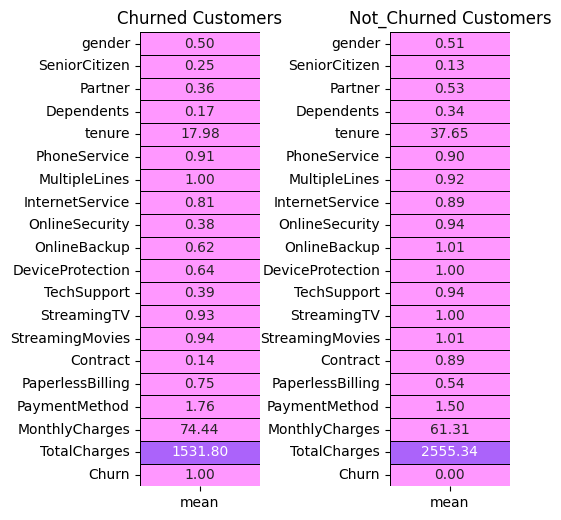

In [32]:
colors = ['#FF97FF','#AB63FA']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers')

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers')

fig.tight_layout(pad = 0)

- Mean values of all the features for churned and not-churned customers.
- Clearly, the customers that churned had a low mean **tenure** of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.
- Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
- Churned customer's Contract value is much smaller than those of not-churned customers.
- Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.
- Not-churned customers TotalCharges, 2557.31, is higher than churn customers, 1531.80.

The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

## **Data Visualization**

In [33]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# creating a subplot with one row and two columns using make_subplots. 
# The specs argument specifies the subplot type as 'domain', indicating it's a pie chart.
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])


fig.add_trace(go.Pie(labels=g_labels, values=telecom_data['gender'].value_counts(), name="Gender"),1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=telecom_data['Churn'].value_counts(), name="Churn"),1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+value+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

- 26.6 % of customers switched to another firm.
- Customers are 49.5 % female and 50.5 % male.

In [55]:
telecom_data["Churn"][telecom_data["Churn"]=="No"].groupby(by=telecom_data["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [56]:
telecom_data["Churn"][telecom_data["Churn"]=="Yes"].groupby(by=telecom_data["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [57]:
fig = px.histogram(telecom_data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [58]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Major customers who moved out were having Electronic Check as Payment Method.
- Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [59]:
telecom_data[telecom_data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [60]:
telecom_data[telecom_data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [61]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [969, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

- A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
- Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [62]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [63]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers that doesn't have partners are more likely to churn

In [64]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(telecom_data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- It can be observed that the fraction of senior citizen is very less.
- Most of the senior citizens churn.


C:\Users\Allu Diwakar\AppData\Local\Temp\ipykernel_15892\59221803.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Allu Diwakar\AppData\Local\Temp\ipykernel_15892\59221803.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of monthly charges by churn')

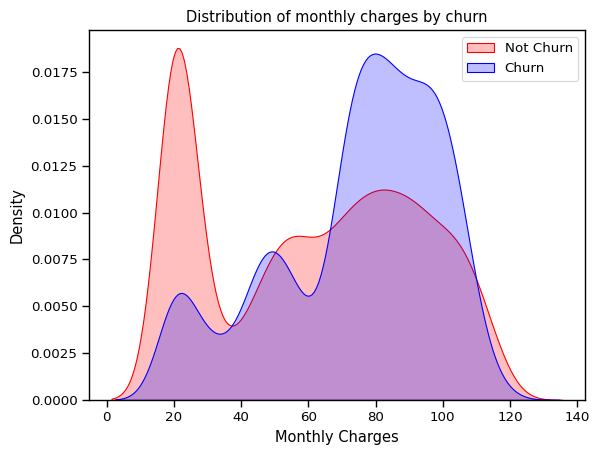

In [65]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Customers with higher Monthly Charges are also more likely to churn

# **Data Preprocessing**



#### **Feature Engineering**

In [66]:
from sklearn.preprocessing import LabelEncoder


df_encoded = telecom_data.copy()

label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

print('Label Encoder Transformation')
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    unique_labels = df_encoded[column].unique()
    print(f"{column}: {unique_labels} = {label_encoder.inverse_transform(unique_labels)}")


Label Encoder Transformation
gender: [0 1] = ['Female' 'Male']
SeniorCitizen: [0 1] = ['No' 'Yes']
Partner: [1 0] = ['Yes' 'No']
Dependents: [0 1] = ['No' 'Yes']
PhoneService: [0 1] = ['No' 'Yes']
MultipleLines: [1 0 2] = ['No phone service' 'No' 'Yes']
InternetService: [0 1 2] = ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 2 1] = ['No' 'Yes' 'No internet service']
OnlineBackup: [2 0 1] = ['Yes' 'No' 'No internet service']
DeviceProtection: [0 2 1] = ['No' 'Yes' 'No internet service']
TechSupport: [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingTV: [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingMovies: [0 2 1] = ['No' 'Yes' 'No internet service']
Contract: [0 1 2] = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0] = ['Yes' 'No']
PaymentMethod: [2 3 0 1] = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: [0 1] = ['No' 'Yes']


In [67]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [68]:
# Replace non-numeric values in 'TotalCharges' with NaN
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')

# Drop rows with NaN values in 'TotalCharges'
df_encoded = df_encoded.dropna(subset=['TotalCharges'])

###### **Data Scaling :**

In [69]:
from sklearn.preprocessing import MinMaxScaler

# Scale the variables to a range of 0 to 1
sc = MinMaxScaler()
df_encoded['tenure'] = sc.fit_transform(df_encoded[['tenure']])
df_encoded['MonthlyCharges'] = sc.fit_transform(df_encoded[['MonthlyCharges']])
df_encoded['TotalCharges'] = sc.fit_transform(df_encoded[['TotalCharges']])

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


- Normalization : tenure, MonthlyCharges and TotalCharges features are normalized as they displayed a right skewed and bimodal data distribution.

###### **Correlation Matrix**

<Axes: >

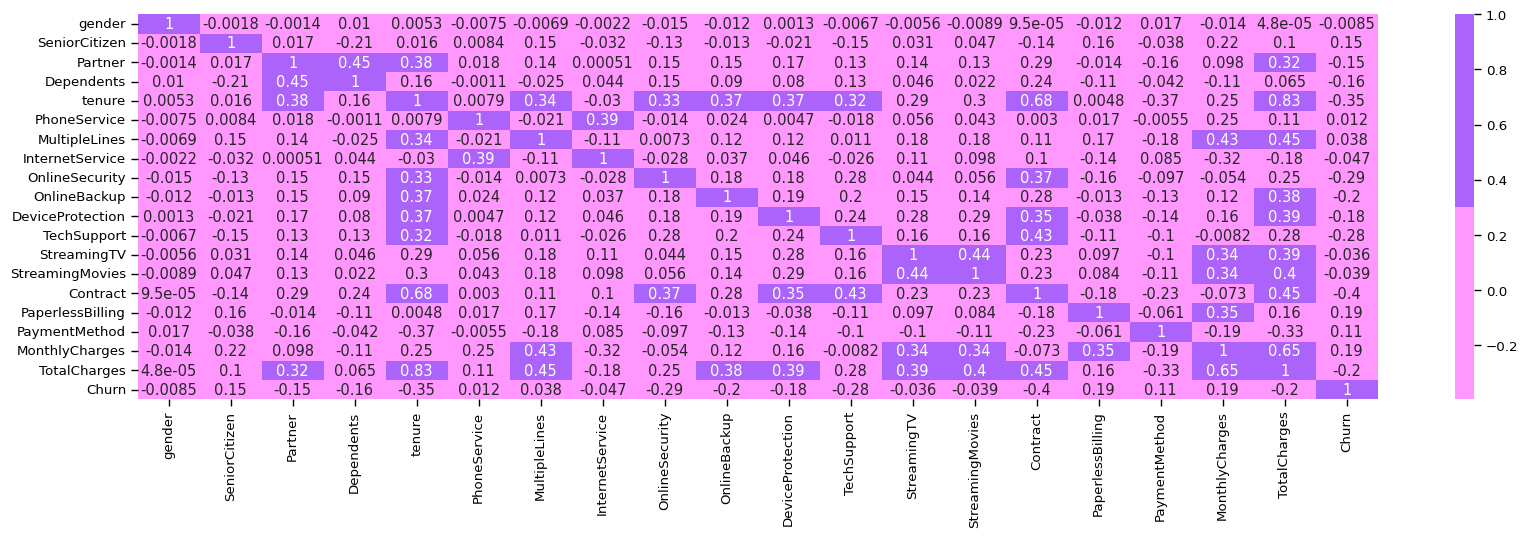

In [70]:
plt.figure(figsize = (20,5))
sns.heatmap(df_encoded.corr(),cmap = colors,annot = True)

In [71]:
fig = go.Figure(data=go.Heatmap(
    z=df_encoded.corr(),
    x=df_encoded.columns,
    y=df_encoded.columns,
    colorscale='Jet', # colorscale determines the color mapping.
    colorbar=dict(title='Correlation'), # colorbar provides a title for the colorbar.
))

fig.update_layout(title='Correlation Heatmap', width=800, height=600)

# If using Jupyter Notebook or Jupyter Lab
fig.show()

# If using other environments, you can save the figure as an HTML file and open it in a web browser
# fig.write_html("correlation_heatmap.html")


It is a huge matrix with too many features. We will check the correlation only with respect to Churn.

Feature Selection for Categorical Features 
- Chi-Squared Test :

Text(0.5, 1.0, 'Selection of Categorical Features')

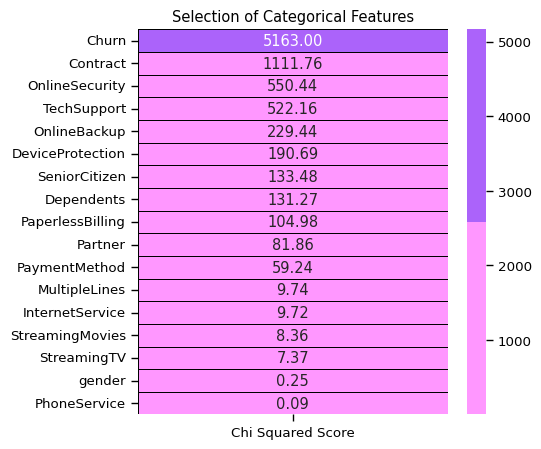

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


features = df_encoded[categorical_features]
target = df_encoded['Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features')

PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

In [73]:
df_encoded.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df_encoded.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,2,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.464789,2,0,2,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.014085,2,2,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.619718,2,0,2,2,1,0,0,0.239303,0.210241,0
4,0,0,0,0.014085,0,0,0,0,0,1,2,0.521891,0.015330,1


Feature Selection for Numerical Features 
- ANOVA

Text(0.5, 1.0, 'Selection of Numerical Features')

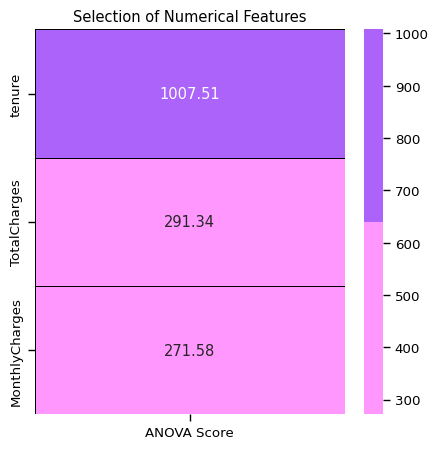

In [74]:
from sklearn.feature_selection import f_classif

features = df_encoded[numerical_features]
target = df_encoded['Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features')


- According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.
- From the above results, we need to include all the numerical features for modeling.

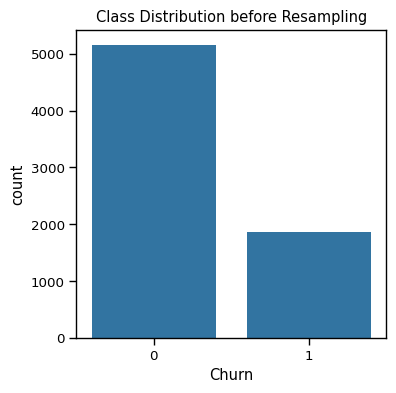

In [75]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Churn', data=df_encoded)
plt.title('Class Distribution before Resampling')
plt.show()

###### **Data Balancing using SMOTE**

In order to cope with unbalanced data, there are 2 options :

- Undersampling : Trim down the majority samples of the target variable.
- Oversampling : Increase the minority samples of the target variable to the majority samples.

<!-- pip install imbalanced-learn -->

In [85]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define the SMOTE object with a sampling strategy of 1 (creates balanced classes)
over_sampler = SMOTE(sampling_strategy=1)

# Assuming 'features' (f1) and 'target' (t1) are columns of your DataFrame (df_encoded)
features = df_encoded.iloc[:, :13].values
target = df_encoded.iloc[:, 13].values

# Apply SMOTE to generate synthetic samples and balance the classes
resampled_features, resampled_target = over_sampler.fit_resample(features, target)

# Count the class distribution after resampling
class_distribution_after_resampling = Counter(resampled_target)

print(resampled_features.shape)
class_distribution_after_resampling


(10326, 13)


Counter({0: 5163, 1: 5163})

## **Modeling**

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(resampled_features, resampled_target, test_size = 0.20, random_state = 2)

Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups.

In [ ]:

# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
# from sklearn.metrics import plot_roc_curve

# def model(classifier, x_train, y_train, x_test, y_test):
#     # Train the classifier on the training data
#     classifier.fit(x_train, y_train)
    
#     # Make predictions on the test set
#     prediction = classifier.predict(x_test)
    
#     # Print cross-validation and ROC_AUC scores
#     print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1), scoring='roc_auc').mean()))
#     print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
#     # Plot the ROC curve
#     plot_roc_curve(classifier, x_test, y_test)
#     plt.title('ROC_AUC_Plot')
#     plt.show()

# def model_evaluation(classifier, x_test, y_test):
#     # Generate and plot the confusion matrix
#     cm = confusion_matrix(y_test, classifier.predict(x_test))
#     names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
#     counts = [value for value in cm.flatten()]
#     percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
#     labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
#     labels = np.asarray(labels).reshape(2, 2)
#     sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    
#     # Print the classification report
#     print(classification_report(y_test, classifier.predict(x_test)))



In [ ]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [ ]:
# model(classifier_xgb,x_train,y_train,x_test,y_test)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predicted_y))

KNN accuracy: 0.7831558567279767
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1062
           1       0.73      0.88      0.80      1004

    accuracy                           0.78      2066
   macro avg       0.79      0.79      0.78      2066
weighted avg       0.80      0.78      0.78      2066



In [ ]:
from sklearn.svm import SVC


svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print(classification_report(y_test, predict_y))

SVM accuracy is : 0.7807357212003873
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1062
           1       0.75      0.83      0.79      1004

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066



In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)

# Make predictions
prediction_test = model_rf.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))
print(classification_report(y_test, predict_y))

0.7928363988383349
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1062
           1       0.75      0.83      0.79      1004

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066



In [ ]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print(classification_report(y_test, predict_y))




Logistic Regression accuracy is : 0.7662149080348499
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1062
           1       0.75      0.83      0.79      1004

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066



In [ ]:
# Logistic Regression
# Decision Trees
# Random Forests
# Gradient Boosting Machines (GBMs)
# Extreme Gradient Boosting (XGBoost)
# AdaBoost
# K-Nearest Neighbors (K-NN)

# Support Vector Machines (SVMs)

# Naive Bayes

### Splitting data for Training and Testing purpose in 80:20 ratio

In [ ]:
y = df_unsampled['Churn'].values
X = df_unsampled.drop(columns = ['Churn'])

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Logistic regression

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7582311168495803


### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree classifier
model_dt = DecisionTreeClassifier()

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
prediction_test = model_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, prediction_test)
print("Accuracy:", accuracy)


Accuracy: 0.8718528082633957


### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100,max_depth=10)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8440929632020658


### GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting Machine classifier
model_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
model_gbm.fit(X_train, y_train)

# Make predictions
prediction_test = model_gbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, prediction_test)
print("Accuracy:", accuracy)

Accuracy: 0.7869593285990962


### Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8595868302130407

### AdaBoost

In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()


model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7846998063266624

### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create the K-Nearest Neighbors classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
model_knn.fit(X_train, y_train)

# Make predictions
prediction_test = model_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, prediction_test)
print("Accuracy:", accuracy)

Accuracy: 0.7692059393156876


### Support Vector Machines

In [ ]:
from sklearn.svm import SVC
# Train an SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

print('SVM accuracy:', svm_classifier.score(X_test, y_test))

SVM accuracy: 0.7688831504196255


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

print('Naive Bayes accuracy:', nb_classifier.score(X_test, y_test))

Naive Bayes accuracy: 0.7408005164622337


#### Top 3 highest accuracy algorithms - DecisionTree,RandomForest,Extreme Gradient Boosting

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the classifiers
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Define the hyperparameters to tune
hyperparameter_grids = {
    'DecisionTree': {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
},
    'RandomForest': {
        'n_estimators': [150, 200, 250, 300],
        'max_depth':[15,20,25],
        'min_samples_split': [2, 5, 10]
        },
    'XGBoost': {
        'n_estimators': [100, 200, 500, 1000],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    }
}

# Perform GridSearchCV for each classifier
results = []
for classifier_name, classifier in classifiers.items():
    hyperparameter_grid = hyperparameter_grids[classifier_name]
    grid_search = GridSearchCV(classifier, hyperparameter_grid,scoring='accuracy')
    grid_search.fit(X, y)

     # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Append results to a list
    results.append((classifier_name, best_params, best_score))

# Create a Pandas DataFrame from the results list
table = pd.DataFrame(results, columns=['Classifier Name', 'Best Parameters', 'Best Score'])

# Print the DataFrame
print(table.to_string())


  Classifier Name                                                                        Best Parameters  Best Score
0    DecisionTree  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}    0.886211
1    RandomForest                         {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 150}    0.908677
2         XGBoost                           {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}    0.901511


### Top 2 highest algorithms - RandomForest and Extreme Gradient Boosting

#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2)

# Perform cross-validation using the cross_val_score method
scores =cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=cv)

# Print the average cross-validation score
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.8915779283639884


In [ ]:
# Define the number of splits and the test set size for cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2)

# Perform cross-validation using the cross_val_score method
scores =cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=cv)

# Print the average cross-validation score
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.9068731848983542


In [ ]:
# Define the number of splits and the test set size for cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2)

# Perform cross-validation using the cross_val_score method
scores =cross_val_score(XGBClassifier(random_state=0), X, y, cv=cv)

# Print the average cross-validation score
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.8717328170377542
